In [63]:
import torch
import numpy as np

In [2]:
from transformers import AutoTokenizer, AutoModel

In [3]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased', output_hidden_states=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
from common.get_data import BasicDataProvider
bdp = BasicDataProvider(dataset_root='/home/ubuntu/11777-Project/data', 
                           dataset_name = 'dataset_v7w_telling.json')

Initializing data provider for dataset dataset_v7w_telling.json...
BasicDataProvider: reading /home/ubuntu/11777-Project/data/dataset_v7w_telling.json


In [20]:
sample1, sample2 = bdp.sampleImageQAPair(), bdp.sampleImageQAPair()

In [24]:
question1 = sample1['qa_pair']['question']
question2 = sample2['qa_pair']['question']

In [25]:
question1, question2

('What is he holding?', 'How many giraffes are in the scene?')

In [34]:
tokenizer([question1, question2]).input_ids

[[101, 2054, 2003, 2002, 3173, 1029, 102],
 [101,
  2129,
  2116,
  21025,
  27528,
  7959,
  2015,
  2024,
  1999,
  1996,
  3496,
  1029,
  102]]

In [56]:
input_ids = torch.tensor(tokenizer.encode(question1)).unsqueeze(0)
outputs = model(input_ids)
hidden_states1 = outputs.hidden_states[-2][0]

In [57]:
input_ids = torch.tensor(tokenizer.encode(question2)).unsqueeze(0)
outputs = model(input_ids)
hidden_states2 = outputs.hidden_states[-2][0]

In [59]:
hidden_states1.shape, hidden_states2.shape

(torch.Size([7, 768]), torch.Size([13, 768]))

In [60]:
sentence_embedding1 = hidden_states1.mean(axis=0).detach().numpy()
sentence_embedding2 = hidden_states2.mean(axis=0).detach().numpy()

In [61]:
sentence_embedding1.shape, sentence_embedding2.shape

((768,), (768,))

In [65]:
np.array([sentence_embedding1, sentence_embedding2])

(2, 768)

In [66]:
all_embedding = np.array([sentence_embedding1, sentence_embedding2])

In [71]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [67]:
tsne = TSNE(n_components=2, init='random', random_state=0)
features = tsne.fit_transform(all_embedding)

In [68]:
features

array([[ -60.312317,  141.36963 ],
       [  60.31256 , -141.36914 ]], dtype=float32)

In [69]:
def tsne_plot(features):
    plt.figure()
    
    plt.xlabel('TSNE 1', fontsize=15)
    plt.ylabel('TSNE 2', fontsize=15)
    plt.title('TSNE for sentence embedding', fontsize=20)
    plt.scatter(features[:, 0], features[:, 1], c='r', s=5)
    plt.show()

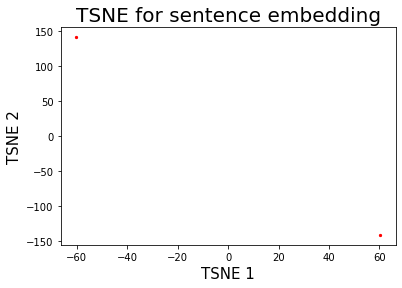

In [72]:
tsne_plot(features)